<a href="https://colab.research.google.com/github/sloaneeliza/RecommenderSys/blob/main/AIFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import os

# Trending Youtube Video Dataset From Kaggle
# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


In [ ]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['US_category_id.json', 'MX_category_id.json', 'RU_category_id.json', 'GBvideos.csv', 'FR_category_id.json', 'CA_category_id.json', 'MXvideos.csv', 'RUvideos.csv', 'INvideos.csv', 'JP_category_id.json', 'JPvideos.csv', 'KR_category_id.json', 'USvideos.csv', 'DE_category_id.json', 'KRvideos.csv', 'FRvideos.csv', 'CAvideos.csv', 'IN_category_id.json', 'DEvideos.csv', 'GB_category_id.json']


In [ ]:
file_to_load = os.path.join(path, 'USvideos.csv')
if 'USvideos.csv' in files:
    data = pd.read_csv(file_to_load)
    print(data.head())
else:
    print("The expected file 'USvideos.csv' is not in the dataset.")

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [ ]:
# Preprocessing

import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

#download stopwords - Jessica
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#load the CSV file
"""
file_path = '/content/USvideos.csv'    #we realized with using the kagglehub import that we do not
data = pd.read_csv(file_path)          #need to import our dataset, but instead, use kagglehub to download the dataset - Sloane, Jessica, Persabella
"""

#Preprocessing function, removes punctuations and stopwords from our video titles - Sloane
def preprocess_text_simple(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

#set preprocessing to the 'title' column of our csv file & remove duplications - Jessica
data['title_preprocessed'] = data['title'].apply(preprocess_text_simple)
data = data.drop_duplicates(subset='title', keep='first')

print(data[['title', 'title_preprocessed']].head())   #preview


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                  title_preprocessed  
0                             [want, talk, marriage]  
1  [trump, presidency, last, week, tonight, john,...  
2  [racist, superman, rudy, mancuso, king, bach, ...  
3                   [nickelback, lyrics, real, fake]  
4                                [dare, going, bald]  


In [ ]:
# ML recommender system using cosine similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Load data - Jessica
data['title_preprocessed'] = data['title'].apply(preprocess_text_simple)
data = data.drop_duplicates(subset='title', keep='first')

# Vectorizing - Jessica
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['title_preprocessed'].apply(lambda x: ' '.join(x)))

# Cosine similarity between the titles - Jessica
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function for ML model - Jessica
def recommend_videos_by_title(video_index, num_recommendations=10):
    # Get similarity scores for the video
    sim_scores = list(enumerate(cosine_sim[video_index]))
    # Sort videos by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the indices of the most similar videos
    sim_scores = sim_scores[1:num_recommendations + 1]
    # Video details
    video_indices = [i[0] for i in sim_scores]
    recommendations = data.iloc[video_indices][['title', 'views']].copy()
    # recommendations['similarity_score'] = [i[1] for i in sim_scores]
    recommendations['similarity_score'] = [sim_scores[i][1] for i in range(len(sim_scores))]
    recommendations = recommendations[['title', 'views', 'similarity_score']]
    return recommendations

# Top 10 recommendations for random video chosen - Jessica & Persabella
random_video_index = random.randint(0, len(data) - 1)
print("ML Recommendations for:", data.iloc[random_video_index]['title'])

num_recommendations = 10
recommendations = recommend_videos_by_title(random_video_index, num_recommendations)
ml_recommendations = recommend_videos_by_title(random_video_index)
print(ml_recommendations)

# Takes the data & the # of recommendations as input using the videos with the highest view
# counts & returns a DataFrame contianing the titles and view counts - Persabella
def recommend_popular_videos(data, num_recommendations=10):
    return data.nlargest(num_recommendations, 'views')[['title', 'views']]

print("Popular Recommendations:")
print(recommend_popular_videos(data, num_recommendations))


ML Recommendations for: Officials Investigating Hawaii Missile False Alarm | NBC News
                                                   title   views  \
12479  Officials Investigating Hawaii Missile False A...   27347   
11807             Hawaii gets false missile strike alert  197815   
34954  Officials Warn Largest Hawaii Volcano Eruption...  361157   
26807                                    Cat Alarm Clock  207312   
13667  Women's March Rallies From Around The U.S. | N...   43649   
3202     Matt Lauer Has Been Fired From NBC News | TODAY  971123   
11076  What To Expect At The 2018 Golden Globes | NBC...    6826   
30583  Funeral For Former First Lady Barbara Bush | N...  372488   
29430     Rapper Meek Mill Speaks Out | NBC Nightly News  120802   
21375         Reverend Billy Graham's Funeral | NBC News  324708   

       similarity_score  
12479          1.000000  
11807          0.446395  
34954          0.357870  
26807          0.252928  
13667          0.200086  
3202     

In [ ]:
#NN Model - Recommendation System
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, normalize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

#preparing the data that we preprocessed in our previous Preprocessing cell - Sloane & Persabella
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['title_preprocessed'])
data['title_seq'] = tokenizer.texts_to_sequences(data['title_preprocessed'])

max_sequence_length = max(data['title_seq'].apply(len))
data['title_seq'] = tf.keras.preprocessing.sequence.pad_sequences(data['title_seq'], maxlen=max_sequence_length, padding='post').tolist()

numerical_features = ['views', 'likes', 'dislikes', 'comment_count']  #example features - sloane
scaler = MinMaxScaler()
X_numerical = scaler.fit_transform(data[numerical_features].values)
X_text = np.array(data['title_seq'].tolist())
y = LabelEncoder().fit_transform(data['category_id'])  #encode categories as integers - sloane

#train/test split - Sloane & Jessica
X_train_num, X_test_num, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_numerical, X_text, y, test_size=0.2
)

#define NN model - Persabella
numerical_input = Input(shape=(len(numerical_features),), name='Numerical_Input')
text_input = Input(shape=(max_sequence_length,), name='Text_Input')

#Embedding layer - Persabella
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)

# LSTM with regularization and dropout
text_lstm = LSTM(32, kernel_regularizer=l2(0.001))(text_embedding)

#Dense layers for numerical features - Persabella
dense_numerical = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(numerical_input)

#Merge inputs - Persabella and Sloane
merged = Concatenate()([text_lstm, dense_numerical])
hidden = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(merged)
hidden = Dropout(0.5)(hidden)  #dropout for regularization
output = Dense(len(set(y)), activation='softmax')(hidden)

# Compile model with reduced learning rate
model = Model(inputs=[numerical_input, text_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#early stopping - Sloane
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Train model
history = model.fit(
    [X_train_num, X_train_text], y_train,
    validation_split=0.2,  #Increased validation split
    epochs=10,             #change epoch to potentially help with overfitting - Sloane, Jessica
    batch_size=32,
    callbacks=[early_stopping]
)

#Generate embeddings - Persabella
def generate_embedding(text_seq, num_features):
    return model.predict([num_features, text_seq], verbose=0)[0]

#recommendation system - Sloane & Jessica
def recommend_videos_nn(video_index, num_recommendations=10):
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )
    target_embedding = normalize([target_embedding])[0]

    print(f"Target Title: {data.iloc[video_index]['title']}")  #prints the title of the target video - Sloane

    similarities = []  #computing cosine similarity - Sloane
    batch_size = 500
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        batch_embeddings = normalize(batch_embeddings)
        batch_similarities = cosine_similarity([target_embedding], batch_embeddings)[0]
        similarities.extend(batch_similarities)

    #sort titles and get the similar titles - Sloane
    similarity_scores = np.array(similarities)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    #print the recommendations and their corresponding scores - Sloane
    for i, idx in enumerate(similar_indices):
        recommended_title = data.iloc[idx]['title']

    return recommendations

#test recommendation system - Sloane
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)
print(recommendations_nn)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2536 - loss: 2.9034 - val_accuracy: 0.2575 - val_loss: 2.6692
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.2514 - loss: 2.6627 - val_accuracy: 0.2575 - val_loss: 2.5576
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.2505 - loss: 2.6008 - val_accuracy: 0.2575 - val_loss: 2.5134
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2513 - loss: 2.5597 - val_accuracy: 0.2575 - val_loss: 2.4809
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2501 - loss: 2.5326 - val_accuracy: 0.2575 - val_loss: 2.4576
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.2484 - loss: 2.5414 - val_accuracy: 0.2575 - val_loss: 2.4403
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2572 - loss: 2.5012 - val_accuracy: 0.2575 - val_loss: 2.4267
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2564 - loss: 2.4699 - val_accuracy: 0.257

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3188 - loss: 2.2627


NN Test Accuracy: 0.3020913898944855


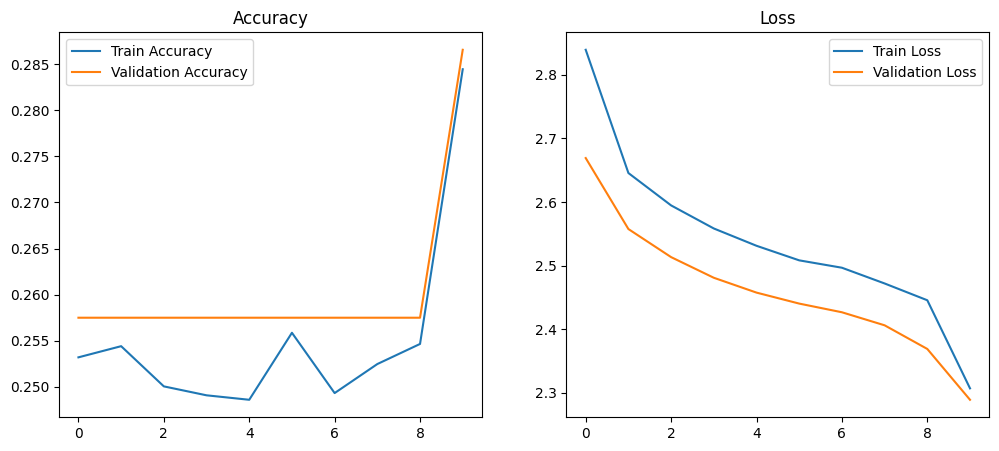

Top contributing words for similarity:
['official' 'hd' 'audio' 'feat' 'twin']


In [ ]:
# Evaulate NN model
# Save and load model functionality - Persabella
results = model.evaluate([X_test_num, X_test_text], y_test)
print(f"NN Test Accuracy: {results[1]}")

model.save('youtube_recommendation_model.h5')

"""
loaded_model = tf.keras.models.load_model('youtube_recommendation_model.h5')

# Use the loaded model for evaluation or prediction
results = loaded_model.evaluate([X_test_num, X_test_text], y_test)

# Make predictions
predictions = loaded_model.predict([X_test_num, X_test_text])
"""

# Visualizing history for training evaluation - Persabella
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# this function takes a video index and returns top words that contribute most
# to the cosine similarity calculations -Persabella
def explain_cosine_similarity(video_index, top_n=5):
    vector = tfidf_matrix[video_index]
    word_contributions = vectorizer.inverse_transform(vector)[0]
    return word_contributions[:top_n]

print("Top contributing words for similarity:")
print(explain_cosine_similarity(random_video_index))



We were having issues with neural networks, specifically with the similarity results being perfect 1s or 99.9% (so, essentially 1). We were using cosine similarity to compute similarity scores, so we tried other methods (besides neural networks and cosine similarities) to see what we could get.

In [ ]:
# Dot-Product method NN - Jessica
# Load data
data['title_preprocessed'] = data['title'].apply(preprocess_text_simple) #load the preprocess
data = data.drop_duplicates(subset='title', keep='first')

def recommend_videos_nn(video_index, num_recommendations=10):
    # Generate the target embedding
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )

    print(f"Recommendations for: {data.iloc[video_index]['title']}")  # Title of the target video

    similarities = []  # To store dot product similarities
    batch_size = 1000
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        # Compute dot product between the target and batch embeddings
        batch_similarities = np.dot(batch_embeddings, target_embedding.T).flatten()
        similarities.extend(batch_similarities)

    # Convert to numpy array for sorting
    similarity_scores = np.array(similarities)

    # Get indices of top recommendations (excluding the target video itself)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title', 'views']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    # Format output like ML system
    print(recommendations)

    return recommendations

# Recommendations for a random video
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)



Recommendations for: How to Buy a Suit
                                             title     views  similarity_score
10000                                    So Sorry.  13305605          0.092955
23824        Maluma - El Préstamo (Official Video)  48431654          0.092927
70     Ed Sheeran - Perfect (Official Music Video)  33523622          0.092840
39149                                  we broke up  16884972          0.092707
28605                      TWICE What is Love? M/V  38873543          0.092672
16181                              To Our Daughter  20921796          0.092647
28624                        Drake - Nice For What  24421448          0.092509
23797                                GOT7 Look M/V  14755537          0.092470
28557               ZAYN - Let Me (Official Video)  11188755          0.092440
23362                      Taylor Swift - Delicate  14820746          0.092407


As seen in the above code, I made a system using a neural network model by dot-product instead of cosine similartiy. Unfortunately, I did not get accurate similarity scores and the code would just recommend the same videos

-- Jessica

In [ ]:
#Recommendations by Euclidean Distance - Sloane
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import time
import random

start_time = time.time() #starts a timer so we can see how long it takes for the code to run

exclude_titles = ["Where are we?", "ME YOU YOU ME"]         #these two titles always appeared in the results no
data = data[~data['title'].isin(exclude_titles)]            #matter what, so i just removed them entirely - Sloane

data['title_preprocessed'] = data['title'].apply(preprocess_text_simple) #load the preprocess
data = data.drop_duplicates(subset='title', keep='first')

vectorizer = TfidfVectorizer(stop_words='english')  #vectorize the titles
title_vectors = vectorizer.fit_transform(data['title_preprocessed'].apply(lambda x: ' '.join(x))).toarray()

distances = pairwise_distances(title_vectors, metric='euclidean')

similarities = 1 / (1 + distances)  #this converts distance to similarities

#recommendation function
def recommend_videos_by_title_euclidean(video_index, num_recommendations=10):
    sim_scores = list(enumerate(distances[video_index]))
    #sort from shortest distance to largest distance
    sim_scores = sorted(sim_scores, key=lambda x: x[1])
    sim_scores = sim_scores[1:num_recommendations + 1]
    video_indices = [i[0] for i in sim_scores]
    recommendations = data.iloc[video_indices][['title', 'views']].copy()
    recommendations['distance'] = [sim_scores[i][1] for i in range(len(sim_scores))]
    recommendations['similarity'] = 1 / (1 + recommendations['distance'])
    return recommendations[['title', 'views', 'distance', 'similarity']]


random_video_index = random.randint(0, len(data) - 1) #picks a random video
print("Euclidean Recommendations for:", data.iloc[random_video_index]['title'])


num_recommendations = 10
recommendations = recommend_videos_by_title_euclidean(random_video_index, num_recommendations)
end_time = time.time() #stops timer after the code completes recommendations
print(recommendations)
print()
print(f"Time taken: {end_time - start_time:.2f} seconds")


<ipython-input-68-b8f0e8b81ffb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title_preprocessed'] = data['title'].apply(preprocess_text_simple) #load the preprocess


Euclidean Recommendations for: James Arthur - Naked
                                                   title    views  distance  \
3135                         James Arthur - Naked Lyrics   443055  0.525592   
38371  Marshmello x Juicy J - You Can Cry (Ft. James ...  2008491  1.033470   
833     Macklemore’s Naked Justin Bieber Painting | WWHL    31816  1.207853   
17381  I Ran Naked Through The Streets of LA! | Shay ...   578843  1.214863   
29999                                     James Bay - Us   529440  1.238919   
17268           Parson James - Only You (Official Video)    90123  1.269432   
37152    We Should Talk About What James Harrison Did...  1408027  1.272965   
1304               Parson James - Only You (Lyric Video)    18525  1.279133   
19187                              James Bay - Wild Love   188185  1.284238   
23771         Oprah Can Make Anyone Cry, Including James   604506  1.296671   

       similarity  
3135     0.655483  
38371    0.491770  
833      0.452929 

I created a neural network that  calculates similarity scores using Euclidean distance. It actually works, and it appropriately calculates the similarity between the titles!

-- Sloane

In [ ]:
# NN with Manhattan Distance - Persabella
def recommend_videos_nn(video_index, num_recommendations=10):
    # Generate the target embedding
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )

    print(f"Recommendations for: {data.iloc[video_index]['title']}")  # Title of the target video

    similarities = []  # Store Manhattan distance similarities
    batch_size = 1000
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        # Compute Manhattan distance and convert to similarity scores
        batch_distances = np.sum(np.abs(batch_embeddings - target_embedding), axis=1)
        batch_similarities = 1 / (1 + batch_distances)  # Convert distances to similarity scores
        similarities.extend(batch_similarities)

    # Convert to numpy array for sorting
    similarity_scores = np.array(similarities)

    # Get indices of top recommendations (excluding the target video itself)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title', 'views']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    # Print recommendations in the requested format
    print(recommendations)

    return recommendations

# Generate recommendations for a random video
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)


Recommendations for: The Algorithm That Will Keep You Buying On Cyber Monday | Mach | NBC News
                                                   title     views  \
10624        [STATION] 엠버 (AMBER) X 루나 (LUNA) 'Lower' MV    753555   
4577   Outrageously Rude Burger King Manager Yells at...     35235   
1207   Funny Japanese Game Show Slippery Stairs - Jus...    601839   
9920          60 Seconds Left - New Year Movie Countdown     25082   
16406      Exclusive: Intel's new smart glasses hands-on    435451   
18187           Dating on Valentine's Day | Anwar Jibawi   1403969   
3270   Los Angeles’s Dangerous Obsession with Car Cha...     41471   
5416   Mixing All My Nail Powders Together (for sale ...   2384983   
1678   Trump Breaks Silence On Roy Moore And Offers D...      3892   
16278                             Intuit | A Giant Story  10008678   

       similarity_score  
10624          0.992766  
4577           0.990131  
1207           0.988612  
9920           0.988402  
1640

When I tried building a neural network with using Manhattan distance to calculate the similarity scores, I only got perfect 1s or scores close to 0.99s.

--Persabella

**Results From Our 3 Tests**

Between Euclidean distance, Dot-product, and Manhattan distance, Euclidean distance was the only neural network method we tried where we got results that were not perfect 1s or 99.9%.

===================================================================================================================

I was still curious as to why cosine similarity was giving us difficulty. So I made a small version of our project (as seen below) to experiment with.

-- Sloane

In [ ]:
#Mini-NN to recommend videos based on titles - Sloane
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np


video_titles = [                                                                #created a sample list of video titles using 3 separate
    "Learn Python Programming",                                                 #languages: Java, Python, and Swift. Each language also
    "Introduction to Machine Learning",                                         #focuses on a specific task. Java focuses on game dev., Python
    "Advanced Deep Learning Techniques",                                        #focuses on machine learning, and Swift focuses on app development.
    "Data Science for Beginners",
    "Understanding Artificial Intelligence",
    "Python for Data Analysis",
    "Getting Started with Game Development in Java",                            #i used a list to implemenet these instead of referencing a csv file
    "Building a Simple 2D Game in Java: A Beginner’s Guide",                    #for time purposes and to avoid any issues with referencing.
    "Java Game Development: Creating a Basic Platformer",
    "Top 10 Game Development Libraries for Java",
    "Getting Started with Swift for iOS App Development",
    "Building a To-Do List App with SwiftUI",
    "Understanding MVVM Architecture in Swift",
    "Creating Beautiful Animations in SwiftUI",
    "Core Data Basics: Building a Notes App in Swift",
    "How to Implement Dark Mode in Your Swift Apps",
]


tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")               #using BERT for the NN

#function to embed titles
def embed_titles(titles):
    tokens = tokenizer(titles, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        embeddings = model(**tokens)
    return embeddings.last_hidden_state.mean(dim=1)

#generate embeddings for video titles
title_embeddings = embed_titles(video_titles).numpy()

#compute cosine similarity between embeddings
cos_sim_nn = cosine_similarity(title_embeddings, title_embeddings)

#function to recommend videos using neural embeddings
def display_similarity_nn(input_title, video_titles, embeddings, top_n=3):
    if input_title not in video_titles:
        return "Title not found in the dataset."

    idx = video_titles.index(input_title)
    similarity_scores = list(enumerate(cos_sim_nn[idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    print(f"Input Title: '{input_title}'")
    for i, score in sorted_scores[1 : top_n + 1]:  #exclude the input itself
        print(f"  - Similar to '{video_titles[i]}': {score:.2f}")

#randomly select a title and display recommendations
input_title = random.choice(video_titles)
display_similarity_nn(input_title, video_titles, title_embeddings)


Input Title: 'Introduction to Machine Learning'
  - Similar to 'Advanced Deep Learning Techniques': 0.71
  - Similar to 'Data Science for Beginners': 0.66
  - Similar to 'Understanding Artificial Intelligence': 0.64


The mini neural network's code that I made is able to appropriately recommend YouTube videos and correctly calculate the similarity scores. I believe there may be several reasons why our main code was unable to do this.


1.   Overfitting - The train loss on our neural network model was very low, which is causing overfitting to happen.
2.   Referencing - Our dataset we were using was much bigger than the simple list I implemented in the dummy code, and I believe with the size of the dataset and the few complications we faced when trying to refernece it could have had an impact on the output of our code.


Overall, we were able to get a working model based off of neural networks with Euclidean distance, and we can work on getting our cosine similartiy in our main NN model to function correctly in the future!

--Sloane

